In [39]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.transform import resize

In [27]:
corals = pd.read_csv("../input/RawDataAruba.csv")

In [28]:
corals.head()

,Unnamed: 0,FileName,PicName,TotPnts,Chain Links,Pixels Wide,Pixels High,Meters Wide,Meters High,Meters^2,PointNum,X coord,Y coord,Species,X Data 1,X Data 2,X Data 3
0,1,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,1,283,314,Sand,Nonbiological,Nonbiological,Nonbiological
1,2,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,2,1391,163,Sand,Nonbiological,Nonbiological,Nonbiological
2,3,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,3,1917,212,Sand,Nonbiological,Nonbiological,Nonbiological
3,4,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,4,2738,481,Sand,Nonbiological,Nonbiological,Nonbiological
4,5,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,5,3387,439,Sand,Nonbiological,Nonbiological,Nonbiological


In [29]:
corals_X_max = corals.groupby("FileName")["X coord"].max()
corals_X_max = corals_X_max.reset_index(name = "XMax")

corals_X_min = corals.groupby("FileName")["X coord"].min()
corals_X_min = corals_X_min.reset_index(name = "XMin")

corals_Y_min = corals.groupby("FileName")["Y coord"].min()
corals_Y_min = corals_Y_min.reset_index(name = "YMin")

corals_Y_max = corals.groupby("FileName")["Y coord"].max()
corals_Y_max = corals_Y_max.reset_index(name = "YMax")

In [30]:
corals = corals.merge(corals_X_max,how = "left")
corals = corals.merge(corals_X_min,how = "left")
corals = corals.merge(corals_Y_max,how = "left")
corals = corals.merge(corals_Y_min,how = "left")

In [31]:
corals

,Unnamed: 0,FileName,PicName,TotPnts,Chain Links,Pixels Wide,Pixels High,Meters Wide,Meters High,Meters^2,...,X coord,Y coord,Species,X Data 1,X Data 2,X Data 3,XMax,XMin,YMax,YMin
0,1,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,...,283,314,Sand,Nonbiological,Nonbiological,Nonbiological,3991,3,2982,6
1,2,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,...,1391,163,Sand,Nonbiological,Nonbiological,Nonbiological,3991,3,2982,6
2,3,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,...,1917,212,Sand,Nonbiological,Nonbiological,Nonbiological,3991,3,2982,6
3,4,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,...,2738,481,Sand,Nonbiological,Nonbiological,Nonbiological,3991,3,2982,6
4,5,testR/c_ARU_02_20190515_T1.CSV,IMG_3021,25,0,4000,3000,0,0,0,...,3387,439,Sand,Nonbiological,Nonbiological,Nonbiological,3991,3,2982,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101980,101981,testR/c_ARU_54_20190510_T5.CSV,IMG_1325,25,0,4000,3000,0,0,0,...,41,2521,Turf,stuff,stuff,stuff,3998,3,2991,6
101981,101982,testR/c_ARU_54_20190510_T5.CSV,IMG_1325,25,0,4000,3000,0,0,0,...,876,2400,Other_sponges,stuff,stuff,stuff,3998,3,2991,6
101982,101983,testR/c_ARU_54_20190510_T5.CSV,IMG_1325,25,0,4000,3000,0,0,0,...,1837,2802,Millepora_sp,stuff,stuff,stuff,3998,3,2991,6
101983,101984,testR/c_ARU_54_20190510_T5.CSV,IMG_1325,25,0,4000,3000,0,0,0,...,3081,2728,Turf,stuff,stuff,stuff,3998,3,2991,6


In [32]:


path = "../input/"

image_file = path + "IMG_3021.JPG"

image = cv2.imread(image_file)

In [33]:
image.shape

(4000, 3000, 3)

In [34]:
mask = np.zeros((image.shape[0],image.shape[1]))

In [36]:
X1 = corals.iloc[0]["XMin"]
X2 = corals.iloc[0]["XMax"]
Y1 = corals.iloc[0]["YMin"]
Y2 = corals.iloc[0]["YMax"]

In [45]:
mask[Y1:Y2,X1:X2] = 1

In [46]:
mask2 = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

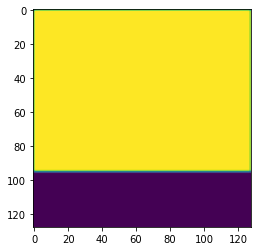

In [47]:
plt.imshow(np.squeeze(mask2))